<a href="https://colab.research.google.com/github/likearlo/TP-ML/blob/main/TP_DucretAlexandre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40.0,155,60.0,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40.0,160,60.0,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [73]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55702.000000,55696.000000,55702.000000,55696.000000,55702.000000,55702.000000,55702.000000,55702.000000,55702.000000,55702.000000,...,55702.000000,55702.000000,55702.000000,55702.000000,55702.000000,55702.000000,55702.000000,55702.000000,55702.000000,55702.000000
mean,27850.497523,44.976569,164.648666,65.864245,82.045207,1.012615,1.007447,1.025583,1.026139,121.493268,...,57.290744,114.963789,14.622418,1.087196,0.885708,26.181932,27.034236,39.948512,0.213314,0.367258
std,16079.922395,170.266643,9.194136,12.820222,9.274171,0.486833,0.485928,0.157888,0.159550,13.675858,...,14.739488,40.925518,1.564476,0.404848,0.221523,19.353940,30.945522,50.286996,0.409651,0.482062
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13925.250000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27850.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41775.750000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,40000.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


les différentes collones sont :

ID	gender	age	height(cm)	weight(kg)	waist(cm)	eyesight(left)	eyesight(right)	hearing(left)	hearing(right)	systolic	relaxation	fasting blood sugar	Cholesterol	triglyceride	HDL	LDL	hemoglobin	Urine protein	serum creatinine	AST	ALT	Gtp	oral	dental caries	tartar	smoking.

il y a 55702 entrées dans le jeu de données.

In [74]:
valeurs_nulles = df.isnull().sum()
total_valeurs_nulles = valeurs_nulles.sum()
print(valeurs_nulles)
print(total_valeurs_nulles)

ID                     0
gender                 0
age                    6
height(cm)             0
weight(kg)             6
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64
12


Il y a 12 valeurs NULL

In [75]:
smoking_df = df[df['smoking'] == 1]
smoking_df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,20457.000000,20456.000000,20457.000000,20456.000000,20457.000000,20457.000000,20457.000000,20457.000000,20457.000000,20457.000000,...,20457.000000,20457.000000,20457.000000,20457.000000,20457.000000,20457.000000,20457.000000,20457.000000,20457.000000,20457.0
mean,28090.347021,43.560813,169.435401,70.959376,84.800538,1.051718,1.047602,1.020775,1.022193,122.806619,...,53.835949,112.539131,15.445295,1.094784,0.948761,27.688029,30.989588,55.568998,0.269150,1.0
std,16099.539463,279.616232,6.799078,12.027117,8.692757,0.482215,0.459022,0.142635,0.147314,13.089254,...,14.145090,42.124568,1.137560,0.427543,0.198026,20.023365,29.630587,65.076257,0.443529,0.0
min,2.000000,20.000000,140.000000,35.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,7.100000,1.000000,0.100000,8.000000,3.000000,1.000000,0.000000,1.0
25%,14147.000000,35.000000,165.000000,65.000000,79.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,44.000000,89.000000,14.800000,1.000000,0.800000,20.000000,17.000000,24.000000,0.000000,1.0
50%,28310.000000,40.000000,170.000000,70.000000,84.400000,1.000000,1.000000,1.000000,1.000000,122.000000,...,52.000000,111.000000,15.500000,1.000000,0.900000,24.000000,24.000000,37.000000,0.000000,1.0
75%,42013.000000,50.000000,175.000000,80.000000,90.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,61.000000,134.000000,16.200000,1.000000,1.100000,30.000000,36.000000,62.000000,1.000000,1.0
max,55691.000000,40000.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,...,618.000000,1860.000000,21.100000,6.000000,10.300000,981.000000,1783.000000,999.000000,1.000000,1.0


moyenne age : 43,5 ans

moyenne taille : 169,4 cm

moyenne poid : 70,9 kg

Il y a des valeurs abberante par example l'age maximum est de 40 000 ans

L'écart type de l'hémoglobine est : 1.56

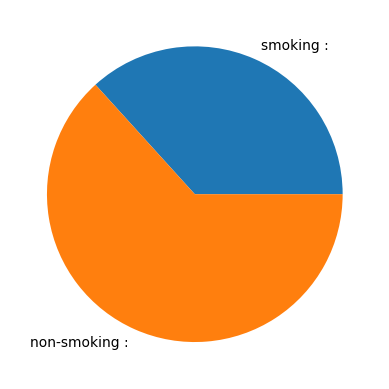

In [76]:
count = df["smoking"].value_counts()
labels = ["smoking :", "non-smoking :"]
size = [count[1], count[0]]
plt.pie(size, labels=labels)
plt.show()

<Axes: xlabel='gender', ylabel='count'>

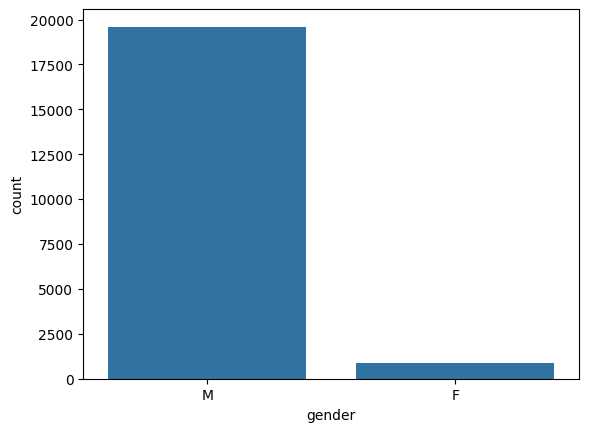

In [77]:
smokingM_df = df[(df['smoking'] == 1) & (df['gender'] == 'M')]
smokingF_df = df[(df['smoking'] == 1) & (df['gender'] == 'F')]
sns.countplot(smoking_df, x = 'gender')

In [78]:
smokingM_df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,19598.000000,19597.000000,19598.000000,19597.000000,19598.000000,19598.000000,19598.000000,19598.000000,19598.000000,19598.000000,...,19598.000000,19598.000000,19598.000000,19598.000000,19598.000000,19598.000000,19598.000000,19598.000000,19598.000000,19598.0
mean,28129.423002,43.437006,169.995918,71.595397,85.133595,1.058445,1.053730,1.020716,1.021941,123.105317,...,53.389581,112.634708,15.532121,1.095418,0.958332,27.873559,31.463619,56.439994,0.270283,1.0
std,16097.595871,285.673503,6.280103,11.715688,8.515280,0.487042,0.463529,0.142437,0.146495,12.968410,...,13.904093,42.429187,1.057614,0.428936,0.194589,20.283990,30.021494,65.752075,0.444117,0.0
min,2.000000,20.000000,145.000000,40.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,7.100000,1.000000,0.100000,8.000000,3.000000,1.000000,0.000000,1.0
25%,14215.500000,35.000000,165.000000,65.000000,79.200000,0.800000,0.800000,1.000000,1.000000,114.000000,...,44.000000,89.000000,14.900000,1.000000,0.900000,20.000000,18.000000,24.000000,0.000000,1.0
50%,28336.500000,40.000000,170.000000,70.000000,85.000000,1.000000,1.000000,1.000000,1.000000,122.000000,...,51.000000,111.000000,15.600000,1.000000,1.000000,24.000000,25.000000,37.000000,0.000000,1.0
75%,42055.500000,50.000000,175.000000,80.000000,90.400000,1.200000,1.200000,1.000000,1.000000,131.000000,...,60.000000,134.000000,16.200000,1.000000,1.100000,30.000000,37.000000,63.000000,1.000000,1.0
max,55691.000000,40000.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,...,618.000000,1860.000000,21.100000,6.000000,10.300000,981.000000,1783.000000,999.000000,1.000000,1.0


In [79]:
smokingF_df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,...,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.0
mean,27198.832363,46.385332,156.647264,56.449360,77.201863,0.898254,0.907800,1.022119,1.027939,115.991851,...,64.019790,110.358556,13.464377,1.080326,0.730384,23.455180,20.174622,35.697322,0.243306,1.0
std,16127.490987,8.010152,5.514774,9.678428,9.223125,0.318335,0.309104,0.147155,0.164895,13.961274,...,15.694886,34.398927,1.096865,0.394392,0.142313,11.947292,14.972072,42.517421,0.429328,0.0
min,89.000000,20.000000,140.000000,35.000000,54.000000,0.100000,0.100000,1.000000,1.000000,81.000000,...,27.000000,31.000000,8.300000,1.000000,0.400000,9.000000,3.000000,7.000000,0.000000,1.0
25%,12995.500000,40.000000,155.000000,50.000000,70.800000,0.700000,0.700000,1.000000,1.000000,106.000000,...,53.000000,86.000000,12.900000,1.000000,0.600000,18.000000,12.000000,16.000000,0.000000,1.0
50%,27214.000000,45.000000,155.000000,55.000000,76.000000,0.900000,0.900000,1.000000,1.000000,116.000000,...,62.000000,108.000000,13.500000,1.000000,0.700000,21.000000,16.000000,24.000000,0.000000,1.0
75%,40763.000000,50.000000,160.000000,60.000000,84.000000,1.200000,1.200000,1.000000,1.000000,125.000000,...,73.000000,130.500000,14.100000,1.000000,0.800000,26.000000,22.000000,38.000000,0.000000,1.0
max,55626.000000,80.000000,175.000000,95.000000,114.300000,2.000000,2.000000,2.000000,2.000000,203.000000,...,123.000000,251.000000,17.500000,6.000000,1.200000,181.000000,215.000000,490.000000,1.000000,1.0


19598 Hommes sont fumeurs

859 Femmes sont fumeuses


la moyenne d'age des hommes fumeur est 43,43 ans

<Axes: >

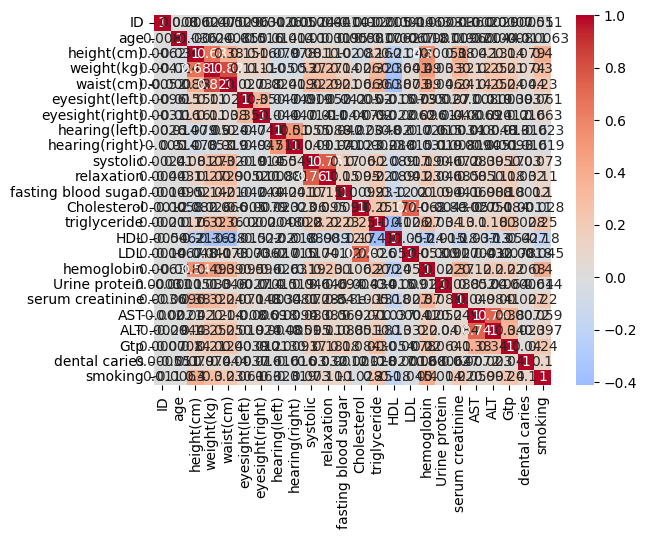

In [80]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix =numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

La matrice est illisible car il y a trop de valeur et certaine collone n'ont pas des valeur chiffrés mais un booléens ce qui ne permet pas de les observés

**Partie 2**

In [81]:
df = df.dropna(how='any')

J'ai décider de supprimmer les valeurs Null car on en a que 12 sur plus de 55 000 entrées cela n'influt donc pas sur le set de données, on est passé de 55 702 données a 55696

In [82]:
encoder = OneHotEncoder()

encoded_tartar = encoder.fit_transform(df[['tartar']]).toarray()
encoded_gender = encoder.fit_transform(df[['gender']]).toarray()
encoded_oral = encoder.fit_transform(df[['oral']]).toarray()

encoded_tartar_df = pd.DataFrame(encoded_tartar, columns=[f"tartar_{i}" for i in range(encoded_tartar.shape[1])])
encoded_gender_df = pd.DataFrame(encoded_gender, columns=[f"gender_{i}" for i in range(encoded_gender.shape[1])])
encoded_oral_df = pd.DataFrame(encoded_oral, columns=[f"oral_{i}" for i in range(encoded_oral.shape[1])])

df = pd.concat([df.drop(columns=['tartar', 'gender', 'oral']), encoded_tartar_df, encoded_gender_df, encoded_oral_df], axis=1)

on pourrait supprimer ou modifier les données abberantes.

**Partie 3**

In [83]:
X = df.drop('smoking',axis = 1)
y = df['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

On sépart les données pour avoir environ 80% pour le train et 20% pour le test

In [84]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

0.6934470377019749

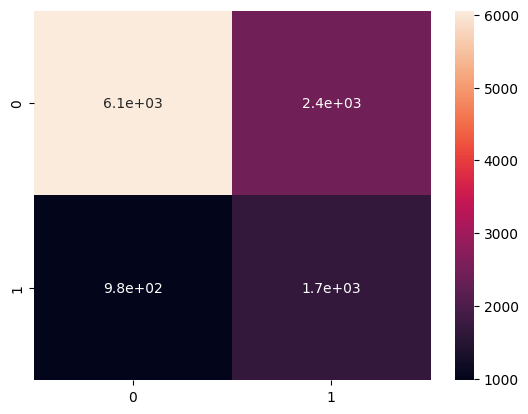

In [85]:
y_pred=clf.predict(X_test)
confusion_mat_result = confusion_matrix(y_pred,y_test)
sns.heatmap(confusion_mat_result, annot=True)
accuracy_score(y_test, y_pred)

La précision est de 69,3%

0.6657091561938959
0.3940774487471526
0.2948624299975651


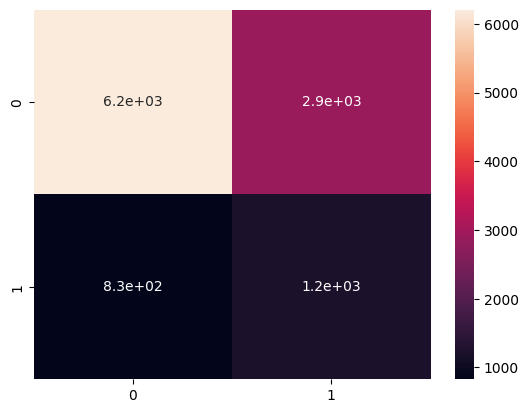

In [86]:
knn = KNeighborsClassifier(n_neighbors=10)
X_train_0 , X_test_0 ,y_train_0,y_test_0=train_test_split(X,y,test_size=0.2,random_state=0)
knn.fit(X_train_0,y_train_0)
y_pred_0=knn.predict(X_test_0)
confusion_mat_result_0 = confusion_matrix(y_pred_0,y_test_0)
sns.heatmap(confusion_mat_result_0, annot=True)
print(accuracy_score(y_test_0, y_pred_0))
print(f1_score(y_test_0, y_pred_0))
print(recall_score(y_test_0, y_pred_0))

Ici l'hyperparamètre que l'on fait varier est le nombre de voisins

On obtient 66,57% d'accuracy

0.7460502692998204
0.6731369150779896
0.7092768444119796


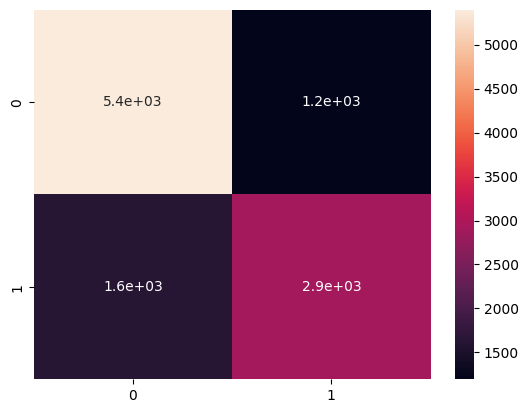

In [87]:
tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=50, random_state=0)
X_train_1 , X_test_1 ,y_train_1,y_test_1=train_test_split(X,y,test_size=0.2,random_state=0)
tree.fit(X_train_1,y_train_1)
y_pred_1 = tree.predict(X_test_1)
confusion_mat_result_1 = confusion_matrix(y_pred_1,y_test_1)
sns.heatmap(confusion_mat_result_1, annot=True)
print(accuracy_score(y_test_1, y_pred_1))
print(f1_score(y_test_1, y_pred_1))
print(recall_score(y_test_1, y_pred_1))

Ici il y a plusieurs hyper paramètre qui sont

-Le criterion

-La profondeur maximale de l'arbre.

-Le nombre minimum d'échantillons requis pour être à un nœud feuille.

On obtient 74,60% d'accuracy

0.8317773788150807
0.7778041261560352
0.79863647431215


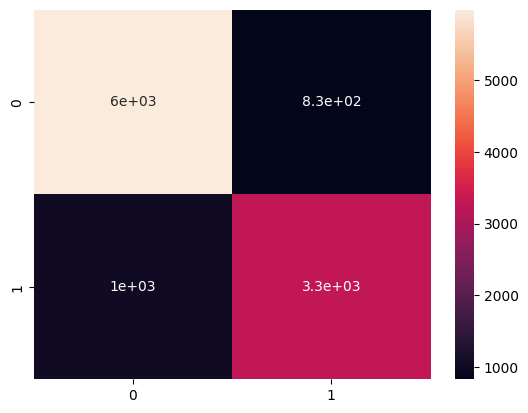

In [88]:
clf = RandomForestClassifier(max_depth=40, random_state=0)
X_train_2 , X_test_2 ,y_train_2,y_test_2=train_test_split(X,y,test_size=0.2,random_state=0)
clf.fit(X_train_2,y_train_2)
y_pred_2 = clf.predict(X_test_2)
confusion_mat_result_2 = confusion_matrix(y_pred_2,y_test_2)
sns.heatmap(confusion_mat_result_2, annot=True)
print(accuracy_score(y_test_2, y_pred_2))
print(f1_score(y_test_2, y_pred_2))
print(recall_score(y_test_2, y_pred_2))

Ici l'hyperparamètre a faire varier est la profondeur maximale

On obtient 83,17% d'accuracy

0.7625673249551167
0.6886403766921719
0.7121986851716582


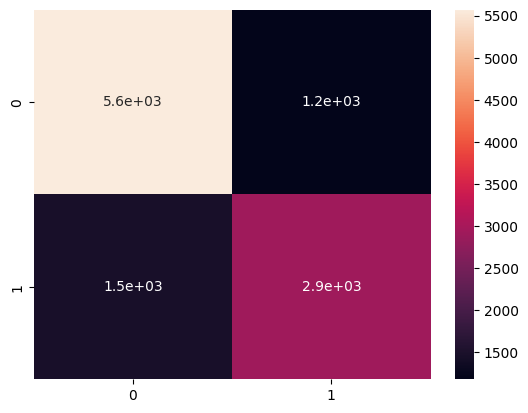

In [89]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
X_train_3 , X_test_3 ,y_train_3,y_test_3=train_test_split(X,y,test_size=0.2,random_state=0)
clf.fit(X_train_3,y_train_3)
y_pred_3 = clf.predict(X_test_3)
confusion_mat_result_3 = confusion_matrix(y_pred_3,y_test_3)
sns.heatmap(confusion_mat_result_3, annot=True)
print(accuracy_score(y_test_3, y_pred_3))
print(f1_score(y_test_3, y_pred_3))
print(recall_score(y_test_3, y_pred_3))

Ici les hyperparamètres sont :

-Le nombre d'arbres dans le modèle de boosting

-Le taux d'apprentissage

-La profondeur maximale de chaque arbre

On obtient 76,25% d'accuracy

L'impact de l'ajustement des hyperparamètre est qu'il modifie la précision de ces algorithme, on les fait donc varier dans le but d'avoir la meilleur précision possible

Le modèle avec la meilleur précision est le random forest classifier qui arrive a avoir une précision de 83,17% avec une profondeur de 40